In [ ]:
#install the required packages in Google Colab by running the following code
# !pip install yfinance
# !pip install pandas
# !pip install numpy
# !pip install matplotlib

In [1]:
# Import necessary packages
import yfinance as yf
import pandas as pd
import numpy as np
from Symbols import nasdaq_symbols, SP_Symbols, DOWjones_symbols
import matplotlib.pyplot as plt

In [2]:
def download_index_data(symbols, start_date, end_date):
    """
    Download historical data for a list of symbols for multiple indices.

    Parameters:
    symbols (dict): A dictionary of index names and their respective symbol lists
    start_date (str): The start date for the data download in 'YYYY-MM-DD' format
    end_date (str): The end date for the data download in 'YYYY-MM-DD' format

    Returns:
    dict: A dictionary of index names and their respective price data as pandas DataFrames.
    """
    index_data = {}
    
    for index_name, index_symbols in symbols.items():
        print(f"Downloading data for {index_name}...")
        
        tickers = yf.download(index_symbols, start=start_date, end=end_date)
        prices = tickers['Adj Close']
        
        index_data[index_name] = prices
        
    return index_data


In [3]:
symbols = {
    'NASDAQ': nasdaq_symbols,
    'S&P 500': SP_Symbols,
    'DOW Jones': DOWjones_symbols
}

start_date = '2012-01-01'
end_date = '2022-12-31'

In [8]:
#Call the download_index_data function to download data for each index
index_data = download_index_data(symbols, start_date, end_date)
nasdaq_prices = index_data['NASDAQ']
sp500_prices = index_data['S&P 500']
dow_prices = index_data['DOW Jones']

[*********************100%***********************]  101 of 101 completed
[*********************100%***********************]  503 of 503 completed

2 Failed downloads:
- BF.B: No data found for this date range, symbol may be delisted
- BRK.B: No timezone found, symbol may be delisted
[*********************100%***********************]  30 of 30 completed


## My algorithm

In [96]:
def get_returns(timeframe, df, n=10):
    df.index = pd.to_datetime(df.index)  # ensure index is a valid DatetimeIndex
    if timeframe == 'M':
        ret = (df.pct_change()+1).resample('M').prod()
    elif timeframe == 'Q':
        ret = (df.pct_change()+1).resample('Q').prod()
    elif timeframe == 'Y':
        ret = (df.pct_change()+1).resample('Y').prod()
    else:
        return 'Invalid timeframe'
    
                
    returns = []
    top10_list = []
    for date in ret.index[:-1]:
        returns.append(pf_performance(date, ret, n))
        
                
    returns_series = pd.Series(returns, index=ret.index[1:])
        
    return returns_series


In [121]:
def get_top_n(date, ret, n):
    top_n = ret.loc[date].nlargest(n).index
    return top_n

In [99]:
def pf_performance(date, ret, n):
    top_n = get_top_n(date, ret, n)
    portfolio = ret.loc[date:, top_n][1:2]
    
    return portfolio.mean(axis=1).values[0]

In [73]:
def plot_cumulative_returns(returns, tf, index_name):
    if tf == 'M':
        color = 'blue'
    elif tf == 'Q':
        color = 'green'
    elif tf == 'Y':
        color = 'orange'
    
    print(returns)
    cum_ret = returns.cumprod()
    ax = cum_ret.plot(color=color)
    ax.set_title(f"Cumulative Returns of {index_name} ({tf}-frequency)", fontsize=16)
    ax.set_xlabel("Date", fontsize=14)
    ax.set_ylabel("Cumulative Return", fontsize=14)
    ax.legend(["Cumulative Returns"], fontsize=12)
    plt.show()

In [64]:
# nasdaq_prices.pct_change()

,AAPL,ABNB,ADBE,ADI,ADP,ADSK,AEP,ALGN,AMAT,AMD,...,TSLA,TXN,VRSK,VRTX,WBA,WBD,WDAY,XEL,ZM,ZS
Date,,,,,,,,,,,,,,,,,,,,,
2012-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-04,0.005374,NaN,-0.010150,-0.001388,-0.001102,-0.019474,0.003189,0.019207,0.005607,-0.003650,...,-0.013177,-0.006385,-0.009655,-0.000931,-0.006957,0.002691,NaN,-0.006584,NaN,NaN
2012-01-05,0.011102,NaN,0.007072,0.004447,0.007353,0.020192,0.001223,-0.009013,0.006506,0.000000,...,-0.021292,0.007102,0.003849,0.028571,-0.003351,0.001464,NaN,0.004418,NaN,NaN
2012-01-06,0.010454,NaN,0.008427,-0.006641,0.001460,0.004542,-0.003908,-0.019843,0.016620,-0.005495,...,-0.007743,0.000000,0.006133,0.028080,0.011003,0.006092,NaN,-0.002932,NaN,NaN
2012-01-09,-0.001586,NaN,-0.006616,0.019499,-0.003826,0.003876,0.004658,-0.043863,0.029973,0.029466,...,0.012635,0.012760,0.000254,0.047871,0.012696,0.006539,NaN,0.000735,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-23,-0.002798,0.004477,0.005735,0.000550,0.007443,0.000319,0.012914,0.000885,-0.003893,0.010335,...,-0.017551,-0.001943,0.006476,-0.014392,0.004943,-0.006500,-0.005857,0.012852,-0.000758,-0.005304
2022-12-27,-0.013878,-0.020645,-0.009928,-0.010010,0.000374,-0.009938,0.006270,0.004517,-0.019338,-0.019374,...,-0.114089,-0.003650,-0.000285,-0.008181,-0.008284,0.006543,-0.007532,0.009023,-0.006526,-0.011123
2022-12-28,-0.030685,-0.011977,-0.020174,-0.011837,-0.013193,-0.023565,-0.009658,-0.014712,-0.011642,-0.011064,...,0.033089,-0.015814,-0.007576,-0.005429,-0.019055,-0.039003,-0.002509,-0.007203,-0.001528,0.002696


In [53]:
sp500_prices

,A,AAL,AAP,AAPL,ABBV,ABC,ABT,ACGL,ACN,ADBE,...,WYNN,XEL,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2012-01-03,23.622652,4.826836,64.123093,12.500195,NaN,31.948912,21.708195,12.493333,42.956367,28.570000,...,85.516449,18.940718,54.497009,32.556160,21.578613,33.970028,47.625420,35.720001,13.945505,NaN
2012-01-04,23.434864,4.741990,65.626434,12.567372,NaN,32.058010,21.623993,12.266667,42.940140,28.280001,...,84.045769,18.816015,54.509651,32.546947,22.291042,34.202030,46.980850,35.450001,14.253191,NaN
2012-01-05,23.959385,5.156796,66.043999,12.706892,NaN,32.301399,21.574242,12.500000,42.120754,28.480000,...,83.167892,18.899149,54.344902,32.574562,21.973452,34.463032,47.537113,35.400002,14.652348,NaN
2012-01-06,24.218403,5.279352,66.350197,12.839730,NaN,32.385319,21.379045,12.486667,42.047749,28.719999,...,80.241570,18.843731,53.939335,32.381321,21.604372,34.712425,47.660721,35.110001,14.668980,NaN
2012-01-09,24.853003,5.392481,66.331657,12.819364,NaN,32.368534,21.375221,12.396667,41.974731,28.530001,...,80.016464,18.857578,54.180153,32.224884,21.690199,34.579029,48.013893,34.950001,14.868559,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-23,148.765411,12.710000,143.279999,131.658981,161.564163,169.487625,107.692398,63.380001,265.006012,338.450012,...,80.720001,69.885384,107.850105,31.583908,109.392502,128.309387,126.448685,248.220001,48.073280,145.418304
2022-12-27,149.084427,12.530000,145.020004,129.831772,161.455200,168.480743,108.080643,63.619999,264.229187,335.089996,...,84.330002,70.515961,109.348579,31.822052,110.379448,129.304794,127.037560,251.000000,48.460247,144.959396
2022-12-28,147.628967,12.320000,145.300003,125.847855,160.702347,166.845779,107.343979,62.599998,262.048126,328.329987,...,80.089996,70.008034,107.552391,30.740479,108.604927,128.717514,125.750015,246.839996,47.597012,143.492844


In [10]:
# mtl = (nasdaq_prices.pct_change()+1).resample('M').prod()
# ret_3 = (nasdaq_prices.pct_change()+1).resample('Q').prod()
# ret_12 = (nasdaq_prices.pct_change()+1).resample('Y').prod()

In [34]:
mtl

,AAPL,ABNB,ADBE,ADI,ADP,ADSK,AEP,ALGN,AMAT,AMD,...,TSLA,TXN,VRSK,VRTX,WBA,WBD,WDAY,XEL,ZM,ZS
Date,,,,,,,,,,,,,,,,,,,,,
2012-01-31,1.110036,1.000000,1.083304,1.086040,1.005876,1.168452,0.970322,0.983716,1.147663,1.224453,...,1.035256,1.093784,1.017785,1.146447,1.009074,1.049180,1.000000,0.972933,1.000000,1.000000
2012-02-29,1.188311,1.000000,1.062682,1.002044,0.991603,1.051389,0.962046,1.087012,1.003739,1.095380,...,1.149295,1.029957,1.085871,1.053315,1.000505,1.087920,1.000000,0.995865,1.000000,1.000000
2012-03-31,1.105283,1.000000,1.043174,1.038531,1.023520,1.118098,1.025791,1.075752,1.016326,1.091157,...,1.114637,1.007796,1.079770,1.053700,1.009952,1.084673,1.000000,1.009249,1.000000,1.000000
2012-04-30,0.974031,1.000000,0.977849,0.964852,1.007791,0.930293,1.006739,1.150998,0.963052,0.917706,...,0.889635,0.955393,1.042155,0.938308,1.046880,1.075692,1.000000,1.022289,1.000000,1.000000
2012-05-31,0.989298,1.000000,0.925484,0.940690,0.937612,0.813310,1.003751,0.984863,0.868887,0.826087,...,0.890432,0.891672,0.978550,1.560291,0.876524,0.920448,1.000000,1.035477,1.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-08-31,0.968792,1.019283,0.910563,0.885434,1.013645,0.932600,1.024625,0.867352,0.889890,0.898380,...,0.927511,0.923528,0.983758,1.004814,0.895423,0.882667,1.060993,1.014621,0.774119,1.026957
2022-09-30,0.879023,0.928571,0.736932,0.919554,0.929452,0.925944,0.862775,0.849856,0.870947,0.746554,...,0.962411,0.936868,0.912665,1.027612,0.895607,0.868580,0.925012,0.867592,0.915298,1.032215
2022-10-31,1.109552,1.017803,1.157340,1.023540,1.068571,1.147216,1.017004,0.938149,1.077627,0.947917,...,0.857832,1.046070,1.072128,1.077571,1.162420,1.130435,1.023650,1.017344,1.133850,0.937519


In [122]:
get_top_n('2012-12-31', ret_3, n=5)

Index(['NFLX', 'ASML', 'META', 'ADBE', 'TSLA'], dtype='object')

In [110]:
# portfolio = ret_12.loc['2012-12-31':,get_top_10('2012-12-31')][1:2]

In [113]:
# portfolio.mean(axis=1).values[0]

1.4755202154941742

In [ ]:
# ret_3.index

In [17]:
returns = []

for date in ret_3.index[:-1]:
    returns.append(pf_performance(date))

In [ ]:
pd.Series(returns, index = ret_3.index[1:])

In [ ]:
pd.Series(returns, index = ret_3.index[1:]).cumprod()

In [99]:
# pf_performance('2021-12-31')

0.628400916607324

In [21]:
pf = ret_12.loc['2021-12-31':,get_top_10('2021-12-31')][1:2]

In [24]:
pf.mean(axis=1).values[0]

0.5759987143355648

<!-- RETURNS FOR NASDAQ INDEX -->

In [103]:
returns_M_nasdaq = get_returns('M', nasdaq_prices)
returns_Q_nasdaq = get_returns('Q', nasdaq_prices)
returns_Y_nasdaq = get_returns('Y', nasdaq_prices)

Date
2012-02-29    1.046309
2012-03-31    1.045479
2012-04-30    1.019142
2012-05-31    0.954519
2012-06-30    1.028733
                ...   
2022-08-31    0.982848
2022-09-30    0.901878
2022-10-31    1.112063
2022-11-30    1.061991
2022-12-31    0.931463
Freq: M, Length: 131, dtype: float64


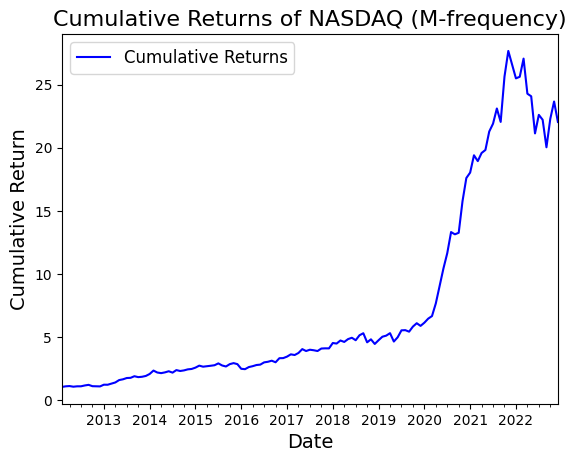

Date
2012-06-30    0.838021
2012-09-30    1.028475
2012-12-31    1.034642
2013-03-31    1.191010
2013-06-30    1.137041
2013-09-30    1.164651
2013-12-31    1.063104
2014-03-31    1.073282
2014-06-30    1.158246
2014-09-30    1.031385
2014-12-31    1.100169
2015-03-31    1.120815
2015-06-30    1.116461
2015-09-30    0.976203
2015-12-31    1.169386
2016-03-31    0.986443
2016-06-30    1.023701
2016-09-30    1.197938
2016-12-31    1.065014
2017-03-31    1.136782
2017-06-30    1.058851
2017-09-30    1.074458
2017-12-31    1.134718
2018-03-31    1.126807
2018-06-30    1.166779
2018-09-30    1.192609
2018-12-31    0.812313
2019-03-31    1.106168
2019-06-30    1.193794
2019-09-30    1.012162
2019-12-31    1.182608
2020-03-31    1.043233
2020-06-30    1.573102
2020-09-30    1.286059
2020-12-31    1.311316
2021-03-31    1.037673
2021-06-30    1.009613
2021-09-30    1.163134
2021-12-31    1.098776
2022-03-31    0.892369
2022-06-30    0.946981
2022-09-30    0.991660
2022-12-31    0.965213
Freq: 

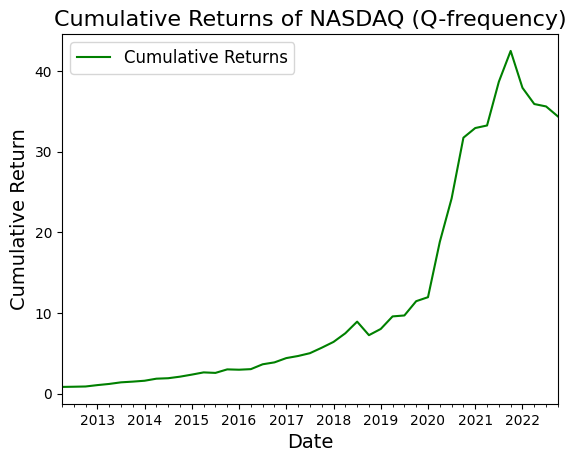

Date
2013-12-31    1.475520
2014-12-31    1.215806
2015-12-31    1.009734
2016-12-31    1.294070
2017-12-31    1.493509
2018-12-31    1.099739
2019-12-31    1.927358
2020-12-31    2.229536
2021-12-31    1.183160
2022-12-31    0.628401
Freq: A-DEC, dtype: float64


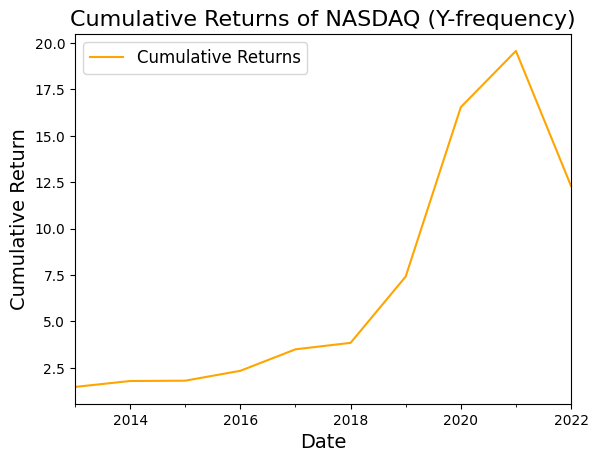

In [104]:
plot_cumulative_returns(returns_M_nasdaq, 'M', 'NASDAQ')
plot_cumulative_returns(returns_Q_nasdaq, 'Q', 'NASDAQ')
plot_cumulative_returns(returns_Y_nasdaq, 'Y', 'NASDAQ')

<!-- RETURNS FOR S&P 500 INDEX -->

In [101]:
returns_M_sp500 = get_returns('M', sp500_prices)
returns_Q_sp500 = get_returns('Q', sp500_prices)
returns_Y_sp500 = get_returns('Y', sp500_prices)

Date
2012-02-29    1.037860
2012-03-31    1.012649
2012-04-30    1.007056
2012-05-31    0.986366
2012-06-30    1.001455
                ...   
2022-08-31    1.002336
2022-09-30    0.953636
2022-10-31    1.081871
2022-11-30    1.048834
2022-12-31    0.943442
Freq: M, Length: 131, dtype: float64


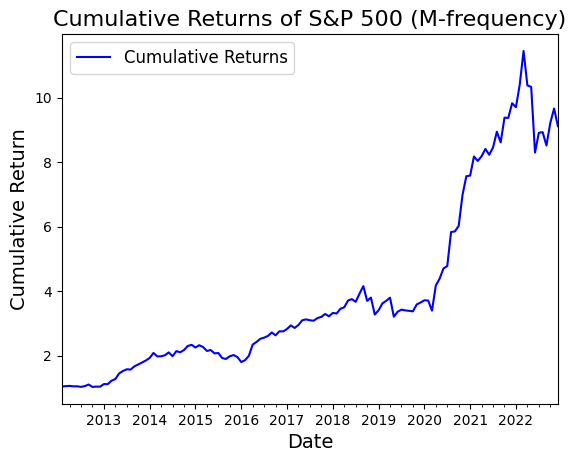

Date
2012-06-30    0.879729
2012-09-30    1.078024
2012-12-31    1.106069
2013-03-31    1.195221
2013-06-30    1.062257
2013-09-30    1.168490
2013-12-31    1.063738
2014-03-31    1.134311
2014-06-30    1.083412
2014-09-30    1.024446
2014-12-31    1.021620
2015-03-31    1.095617
2015-06-30    0.972374
2015-09-30    0.913928
2015-12-31    1.042325
2016-03-31    1.000320
2016-06-30    1.115592
2016-09-30    1.150782
2016-12-31    1.113292
2017-03-31    1.028794
2017-06-30    0.988218
2017-09-30    1.097153
2017-12-31    1.172268
2018-03-31    1.147805
2018-06-30    1.149108
2018-09-30    1.124735
2018-12-31    0.771637
2019-03-31    1.075022
2019-06-30    1.135897
2019-09-30    0.997790
2019-12-31    1.120874
2020-03-31    0.852732
2020-06-30    1.410118
2020-09-30    1.076460
2020-12-31    1.287193
2021-03-31    1.194287
2021-06-30    1.148260
2021-09-30    1.142267
2021-12-31    0.980858
2022-03-31    0.881463
2022-06-30    0.874903
2022-09-30    0.941745
2022-12-31    1.089417
Freq: 

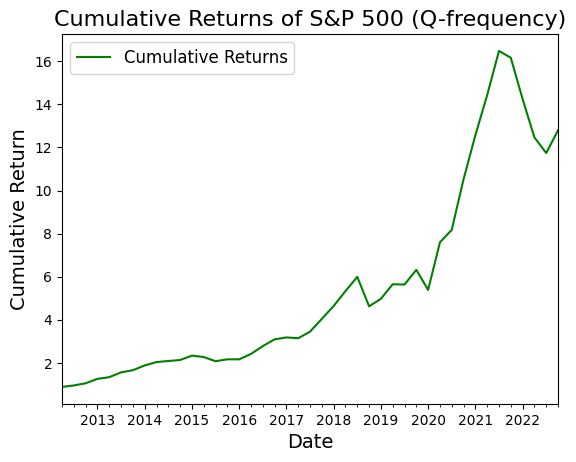

Date
2013-12-31    1.394299
2014-12-31    1.354177
2015-12-31    1.043925
2016-12-31    1.289149
2017-12-31    1.294190
2018-12-31    1.009542
2019-12-31    1.938847
2020-12-31    2.378555
2021-12-31    1.547875
2022-12-31    0.978943
Freq: A-DEC, dtype: float64


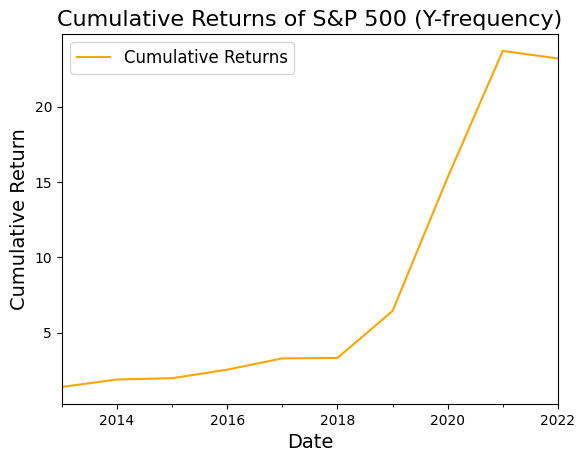

In [102]:
plot_cumulative_returns(returns_M_sp500, 'M', 'S&P 500')
plot_cumulative_returns(returns_Q_sp500, 'Q', 'S&P 500')
plot_cumulative_returns(returns_Y_sp500, 'Y', 'S&P 500')

<!-- RETURNS FOR DOWjones INDEX -->

In [105]:
returns_M_dowJ = get_returns('M', dow_prices)
returns_Q_dowJ = get_returns('Q', dow_prices)
returns_Y_dowJ = get_returns('Y', dow_prices)

Date
2012-02-29    1.071220
2012-03-31    1.045242
2012-04-30    0.985545
2012-05-31    0.954709
2012-06-30    1.036612
                ...   
2022-08-31    0.969230
2022-09-30    0.893821
2022-10-31    1.142297
2022-11-30    1.086578
2022-12-31    0.977260
Freq: M, Length: 131, dtype: float64


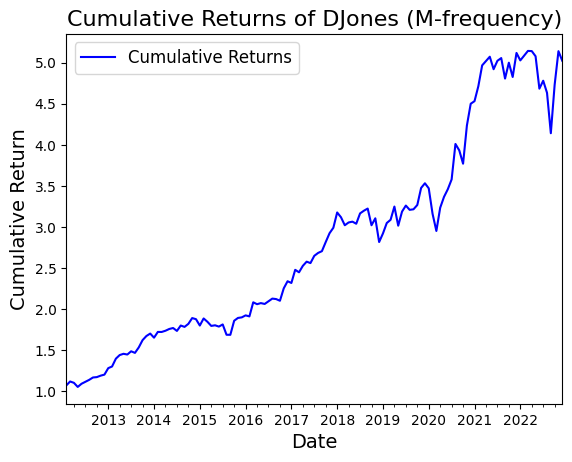

Date
2012-06-30    0.944946
2012-09-30    1.074693
2012-12-31    1.017014
2013-03-31    1.113268
2013-06-30    1.026821
2013-09-30    1.029436
2013-12-31    1.101137
2014-03-31    0.995468
2014-06-30    1.036159
2014-09-30    0.997800
2014-12-31    1.070955
2015-03-31    1.052254
2015-06-30    1.002883
2015-09-30    0.945931
2015-12-31    1.125410
2016-03-31    1.005553
2016-06-30    1.039089
2016-09-30    0.999283
2016-12-31    1.067145
2017-03-31    1.037034
2017-06-30    1.035098
2017-09-30    1.059426
2017-12-31    1.123611
2018-03-31    1.022260
2018-06-30    1.032859
2018-09-30    1.119370
2018-12-31    0.887036
2019-03-31    1.061100
2019-06-30    1.049641
2019-09-30    1.016381
2019-12-31    1.070678
2020-03-31    0.803535
2020-06-30    1.196602
2020-09-30    1.056745
2020-12-31    1.086862
2021-03-31    1.164362
2021-06-30    1.013676
2021-09-30    1.001303
2021-12-31    1.111300
2022-03-31    0.960507
2022-06-30    0.918148
2022-09-30    0.903972
2022-12-31    1.128906
Freq: 

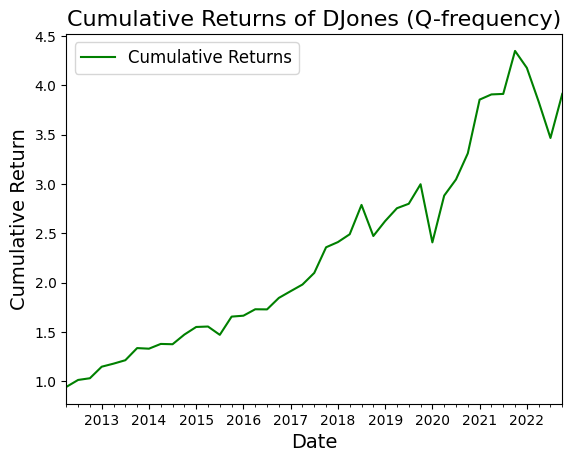

Date
2013-12-31    1.379933
2014-12-31    1.199268
2015-12-31    1.126768
2016-12-31    1.045194
2017-12-31    1.265828
2018-12-31    1.069394
2019-12-31    1.258583
2020-12-31    1.256110
2021-12-31    1.227853
2022-12-31    0.925591
Freq: A-DEC, dtype: float64


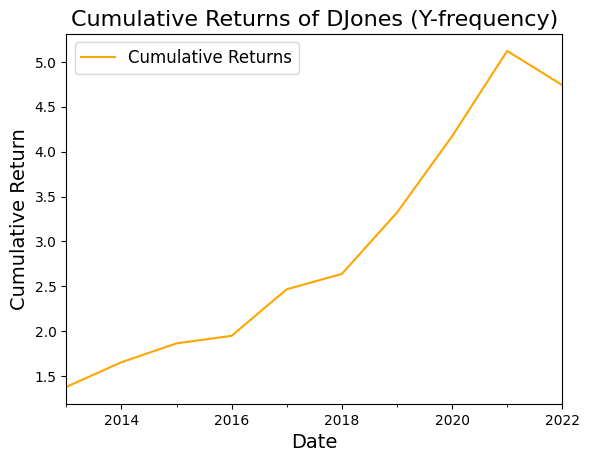

In [106]:
plot_cumulative_returns(returns_M_dowJ, 'M', 'DJones')
plot_cumulative_returns(returns_Q_dowJ, 'Q', 'DJones')
plot_cumulative_returns(returns_Y_dowJ, 'Y', 'DJones')

# S&P 500 TOP5 PORTFOLIO PERFORMANCE USING QUARTERLY FREQ

In [109]:
returns_Q_sp500_top5 = get_returns('Q', sp500_prices, n=5)

Date
2012-06-30    0.880227
2012-09-30    1.033984
2012-12-31    1.068314
2013-03-31    1.253268
2013-06-30    1.217148
2013-09-30    1.159693
2013-12-31    1.052694
2014-03-31    1.135379
2014-06-30    1.127174
2014-09-30    1.033543
2014-12-31    0.958090
2015-03-31    1.099875
2015-06-30    0.991860
2015-09-30    0.927440
2015-12-31    1.150934
2016-03-31    0.984621
2016-06-30    1.140085
2016-09-30    1.139298
2016-12-31    1.080259
2017-03-31    1.052091
2017-06-30    0.996149
2017-09-30    1.149652
2017-12-31    1.287808
2018-03-31    1.078555
2018-06-30    1.110956
2018-09-30    1.210585
2018-12-31    0.756123
2019-03-31    1.016737
2019-06-30    1.218243
2019-09-30    1.141390
2019-12-31    1.115329
2020-03-31    0.860738
2020-06-30    1.568121
2020-09-30    1.010345
2020-12-31    1.462398
2021-03-31    1.242588
2021-06-30    1.194751
2021-09-30    1.193980
2021-12-31    0.913542
2022-03-31    0.914066
2022-06-30    0.886412
2022-09-30    0.957792
2022-12-31    1.114793
Freq: 

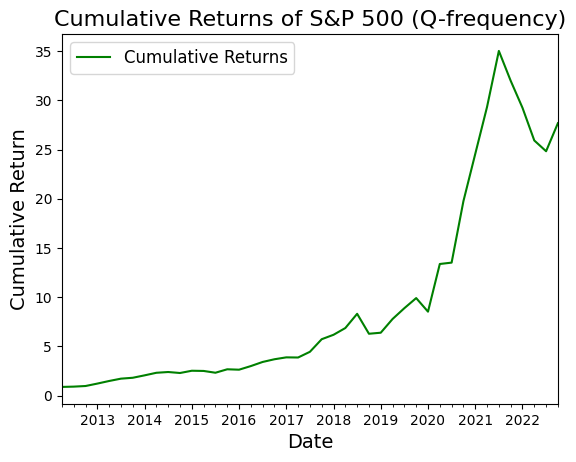

In [110]:
plot_cumulative_returns(returns_Q_sp500_top5, 'Q', 'S&P 500')